<h4>Import Libraries</h4>

In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from matplotlib                    import offsetbox
from sklearn.decomposition         import PCA
from sklearn.preprocessing         import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets              import load_iris, load_digits

<h5>Basic Parameters for Housekeeing</h5>

In [4]:
# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1,
          'scatter.edgecolors': 'b' # edge color of markers
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

<Figure size 1500x700 with 0 Axes>

<h4>Helper Function</h4>

In [6]:
 # Utility function to visualize the outputs of PCA and t-SNE

def digit_scatter(x : np.ndarray, labels : np.ndarray):
    '''
    Args:
        x: (dimentional data)
        labels : labels of the data
    Returns:
        
    
    '''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    fig, ax = plt.subplots(figsize=(6, 6))
    
    #ax = plt.subplot(aspect='equal')
    ax.set_aspect('auto')
    
    sc = ax.scatter(x[:,0], x[:,1], s=15, 
                    c=palette[labels.astype(np.int16)], 
                    edgecolors = 'k')
    
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[labels == i, :], axis=0)
        
        txt = ax.text(xtext, ytext, str(i), fontsize=20)
        
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
    return

In [7]:
iris        = load_iris()

features    = iris.data
labels      = iris.target

num_classes = np.unique(labels)

In [8]:
num_classes

array([0, 1, 2])

In [9]:
scaler   = StandardScaler()

X_scaled = scaler.fit_transform(features)

X_scaled.mean()

-1.4684549872375404e-15

In [10]:
X_scaled.max(), X_scaled.min()

(3.0907752482994253, -2.43394714190809)

In [11]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [21]:
X_scaled.shape

(150, 4)

In [23]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [25]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [27]:
X_pca = pca.transform(X_scaled)
X_pca.shape

(150, 2)

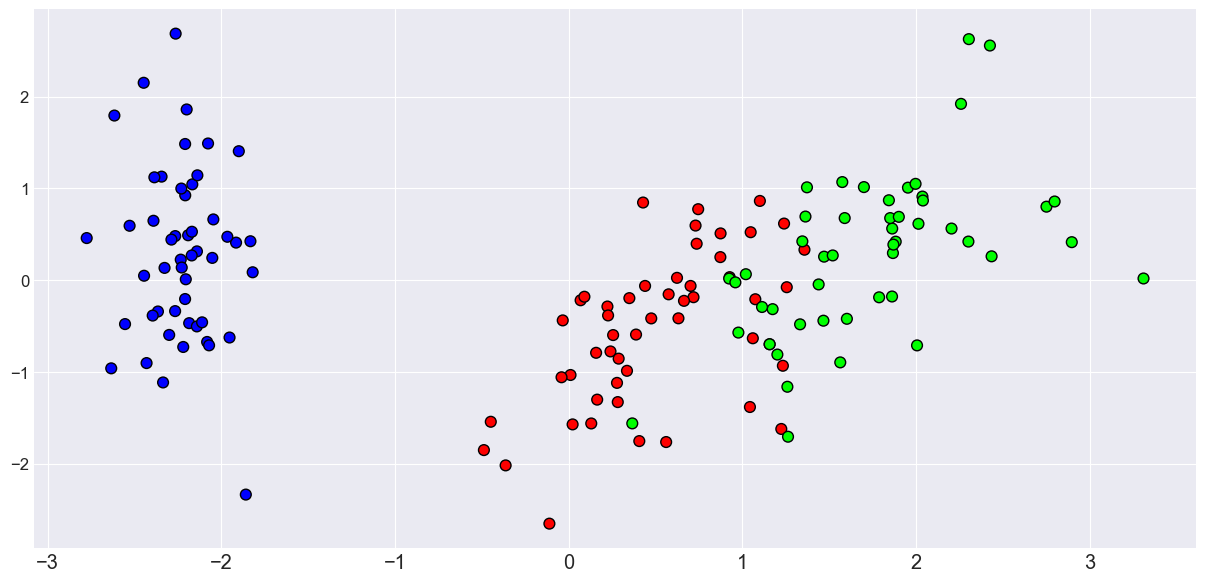

In [29]:
fig , ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1], s= 60,
          c =labels, cmap =CMAP, ec = 'k')
plt.show()


In [33]:
X_pca.mean(axis= 0)

array([2.73855013e-16, 1.42016029e-16])

In [37]:
X_pca.std(axis = 0)

array([1.70836115, 0.95604941])

<Axes: >

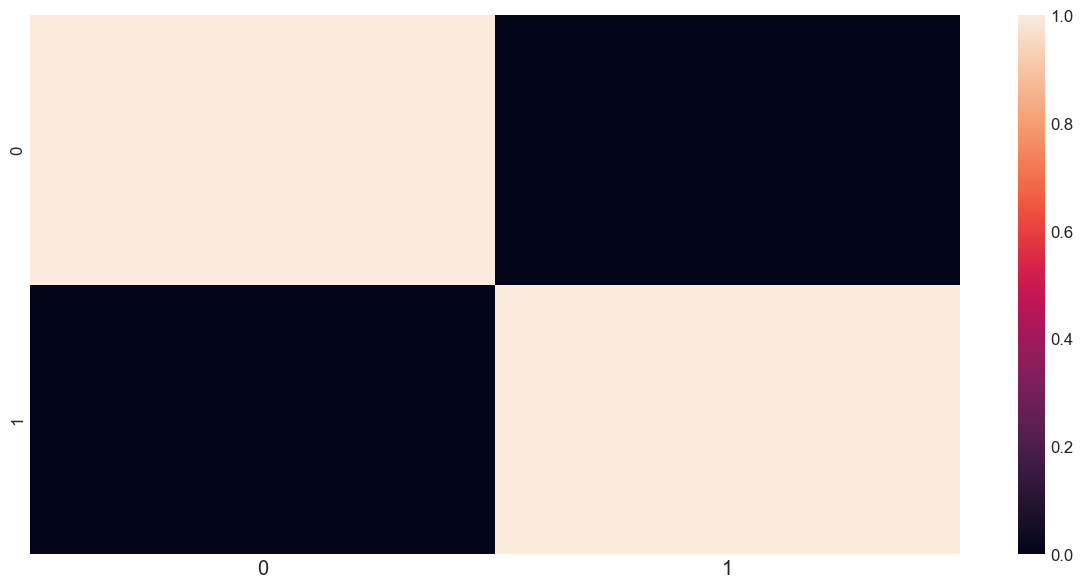

In [75]:
sns.heatmap(np.corrcoef(X_pca.T)) 

In [47]:
digits = load_digits()
X,y = digits.data, digits.target
n_sample, N_features = X.shape
display(n_sample, N_features)

n_neigbhor = 30

1797

64

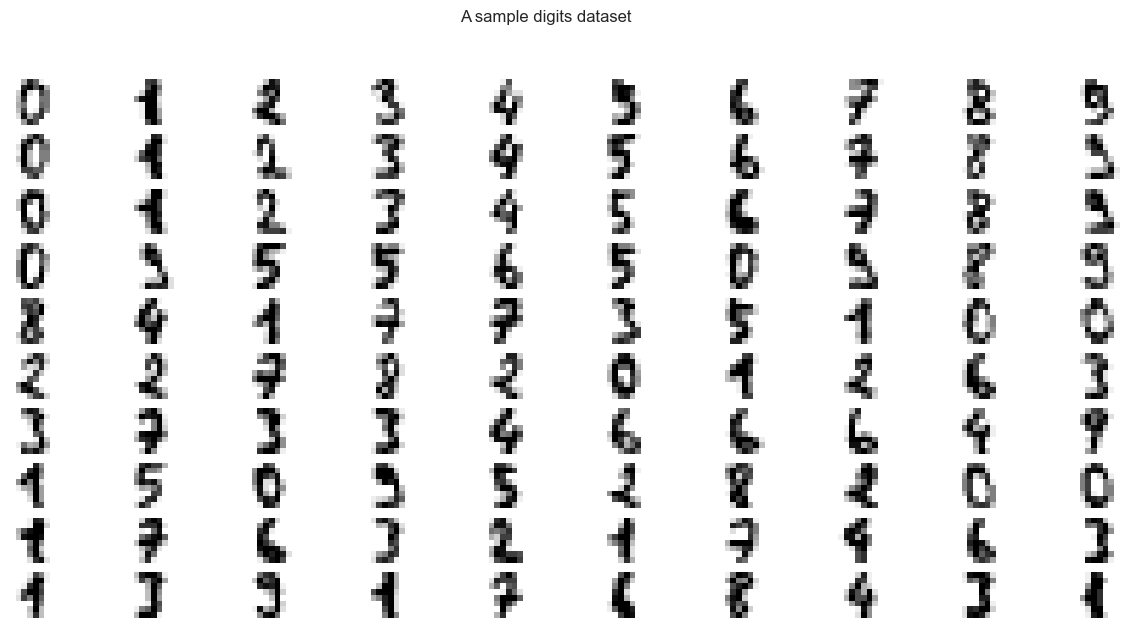

In [49]:
fig, axs = plt.subplots(nrows=10, ncols=10)

for idx, ax in enumerate(axs.ravel()):
    
    ax.imshow(X[idx].reshape((8, 8)), cmap = plt.cm.binary)
    
    ax.axis("off")

_ = fig.suptitle("A sample digits dataset")

In [53]:
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled.mean())

pca = PCA(n_components=2)
pca.fit(X_scaled)

projections = pca.transform(X_scaled)
projections.shape

8.649483775599439e-19

(1797, 2)

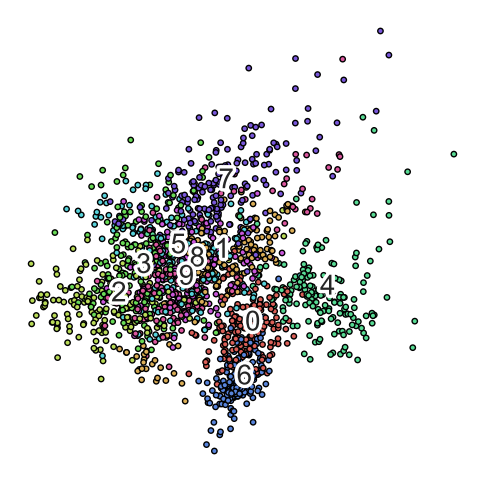

In [63]:
_ = digit_scatter(projections,y)

In [71]:
lda = LinearDiscriminantAnalysis(n_components=2)

data = X_scaled.copy()

projections = lda.fit_transform(data, y =y)
projections.shape

(1797, 2)

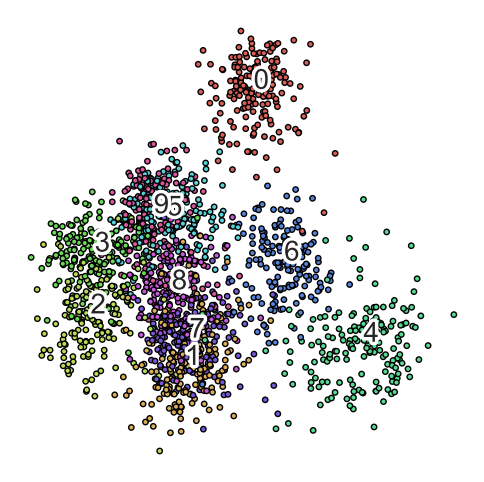

In [81]:
_= digit_scatter(projections, y)